# importing libraries

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# dataset

In [31]:
data = pd.read_csv('indian_cities_data_disability_only.csv')
print(data.head())


   Age       City      Gender   Income             Education  Occupation/Job  \
0   69      Patna  Non-binary   732454  Undergraduate degree      Unemployed   
1   27       Pune  Non-binary   607773     Primary education  Businessperson   
2   22    Lucknow      Female  1847149  Undergraduate degree         Teacher   
3   52      Surat        Male  1238999   Postgraduate degree          Artist   
4   70  Hyderabad        Male  1378788   Secondary education         Student   

  Geophysical Location Tech Level           Disability  Budget Usage Frequency  
0            Sub-urban        Low  Mobility impairment   18638          Weekly  
1            Sub-urban        Low   Hearing impairment   74124         Monthly  
2                Rural     Medium   Hearing impairment   86303         Monthly  
3                Urban       High    Speech impairment   62017         Monthly  
4            Sub-urban        Low  Mobility impairment   68162          Weekly  


# info

In [32]:
data = data[['Age', 'Gender', 'Income', 'Education', 'Geophysical Location', 'Tech Level', 'Disability', 'Budget', 'Usage Frequency']]
data.dropna(inplace=True)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   991 non-null    int64 
 1   Gender                991 non-null    object
 2   Income                991 non-null    int64 
 3   Education             991 non-null    object
 4   Geophysical Location  991 non-null    object
 5   Tech Level            991 non-null    object
 6   Disability            991 non-null    object
 7   Budget                991 non-null    int64 
 8   Usage Frequency       991 non-null    object
dtypes: int64(3), object(6)
memory usage: 69.8+ KB
None


# ENCODING

In [33]:
label_encoders = {}
categorical_columns = ['Gender', 'Education', 'Geophysical Location', 'Tech Level', 'Disability', 'Usage Frequency']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

print(data.head())


   Age  Gender   Income  Education  Geophysical Location  Tech Level  \
0   69       2   732454          4                     1           1   
1   27       2   607773          2                     1           1   
2   22       0  1847149          4                     0           2   
3   52       1  1238999          1                     2           0   
4   70       1  1378788          3                     1           1   

   Disability  Budget  Usage Frequency  
0           2   18638                2  
1           1   74124                1  
2           1   86303                1  
3           3   62017                1  
4           2   68162                2  


# SCALING

In [34]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
print(scaled_df.head())


        Age    Gender    Income  Education  Geophysical Location  Tech Level  \
0  1.081461  1.230637 -0.649506   1.338742             -0.014862   -0.070492   
1 -1.187318  1.230637 -0.876977  -0.068144             -0.014862   -0.070492   
2 -1.457411 -1.218281  1.384173   1.338742             -1.242222    1.176958   
3  0.163146  0.006178  0.274648  -0.771587              1.212498   -1.317942   
4  1.135480  0.006178  0.529683   0.635299             -0.014862   -0.070492   

   Disability    Budget  Usage Frequency  
0   -0.009321 -1.232781         1.187711  
1   -0.719873  0.780573        -0.043483  
2   -0.719873  1.222497        -0.043483  
3    0.701230  0.341260        -0.043483  
4   -0.009321  0.564237         1.187711  


# PAIR PLOTs

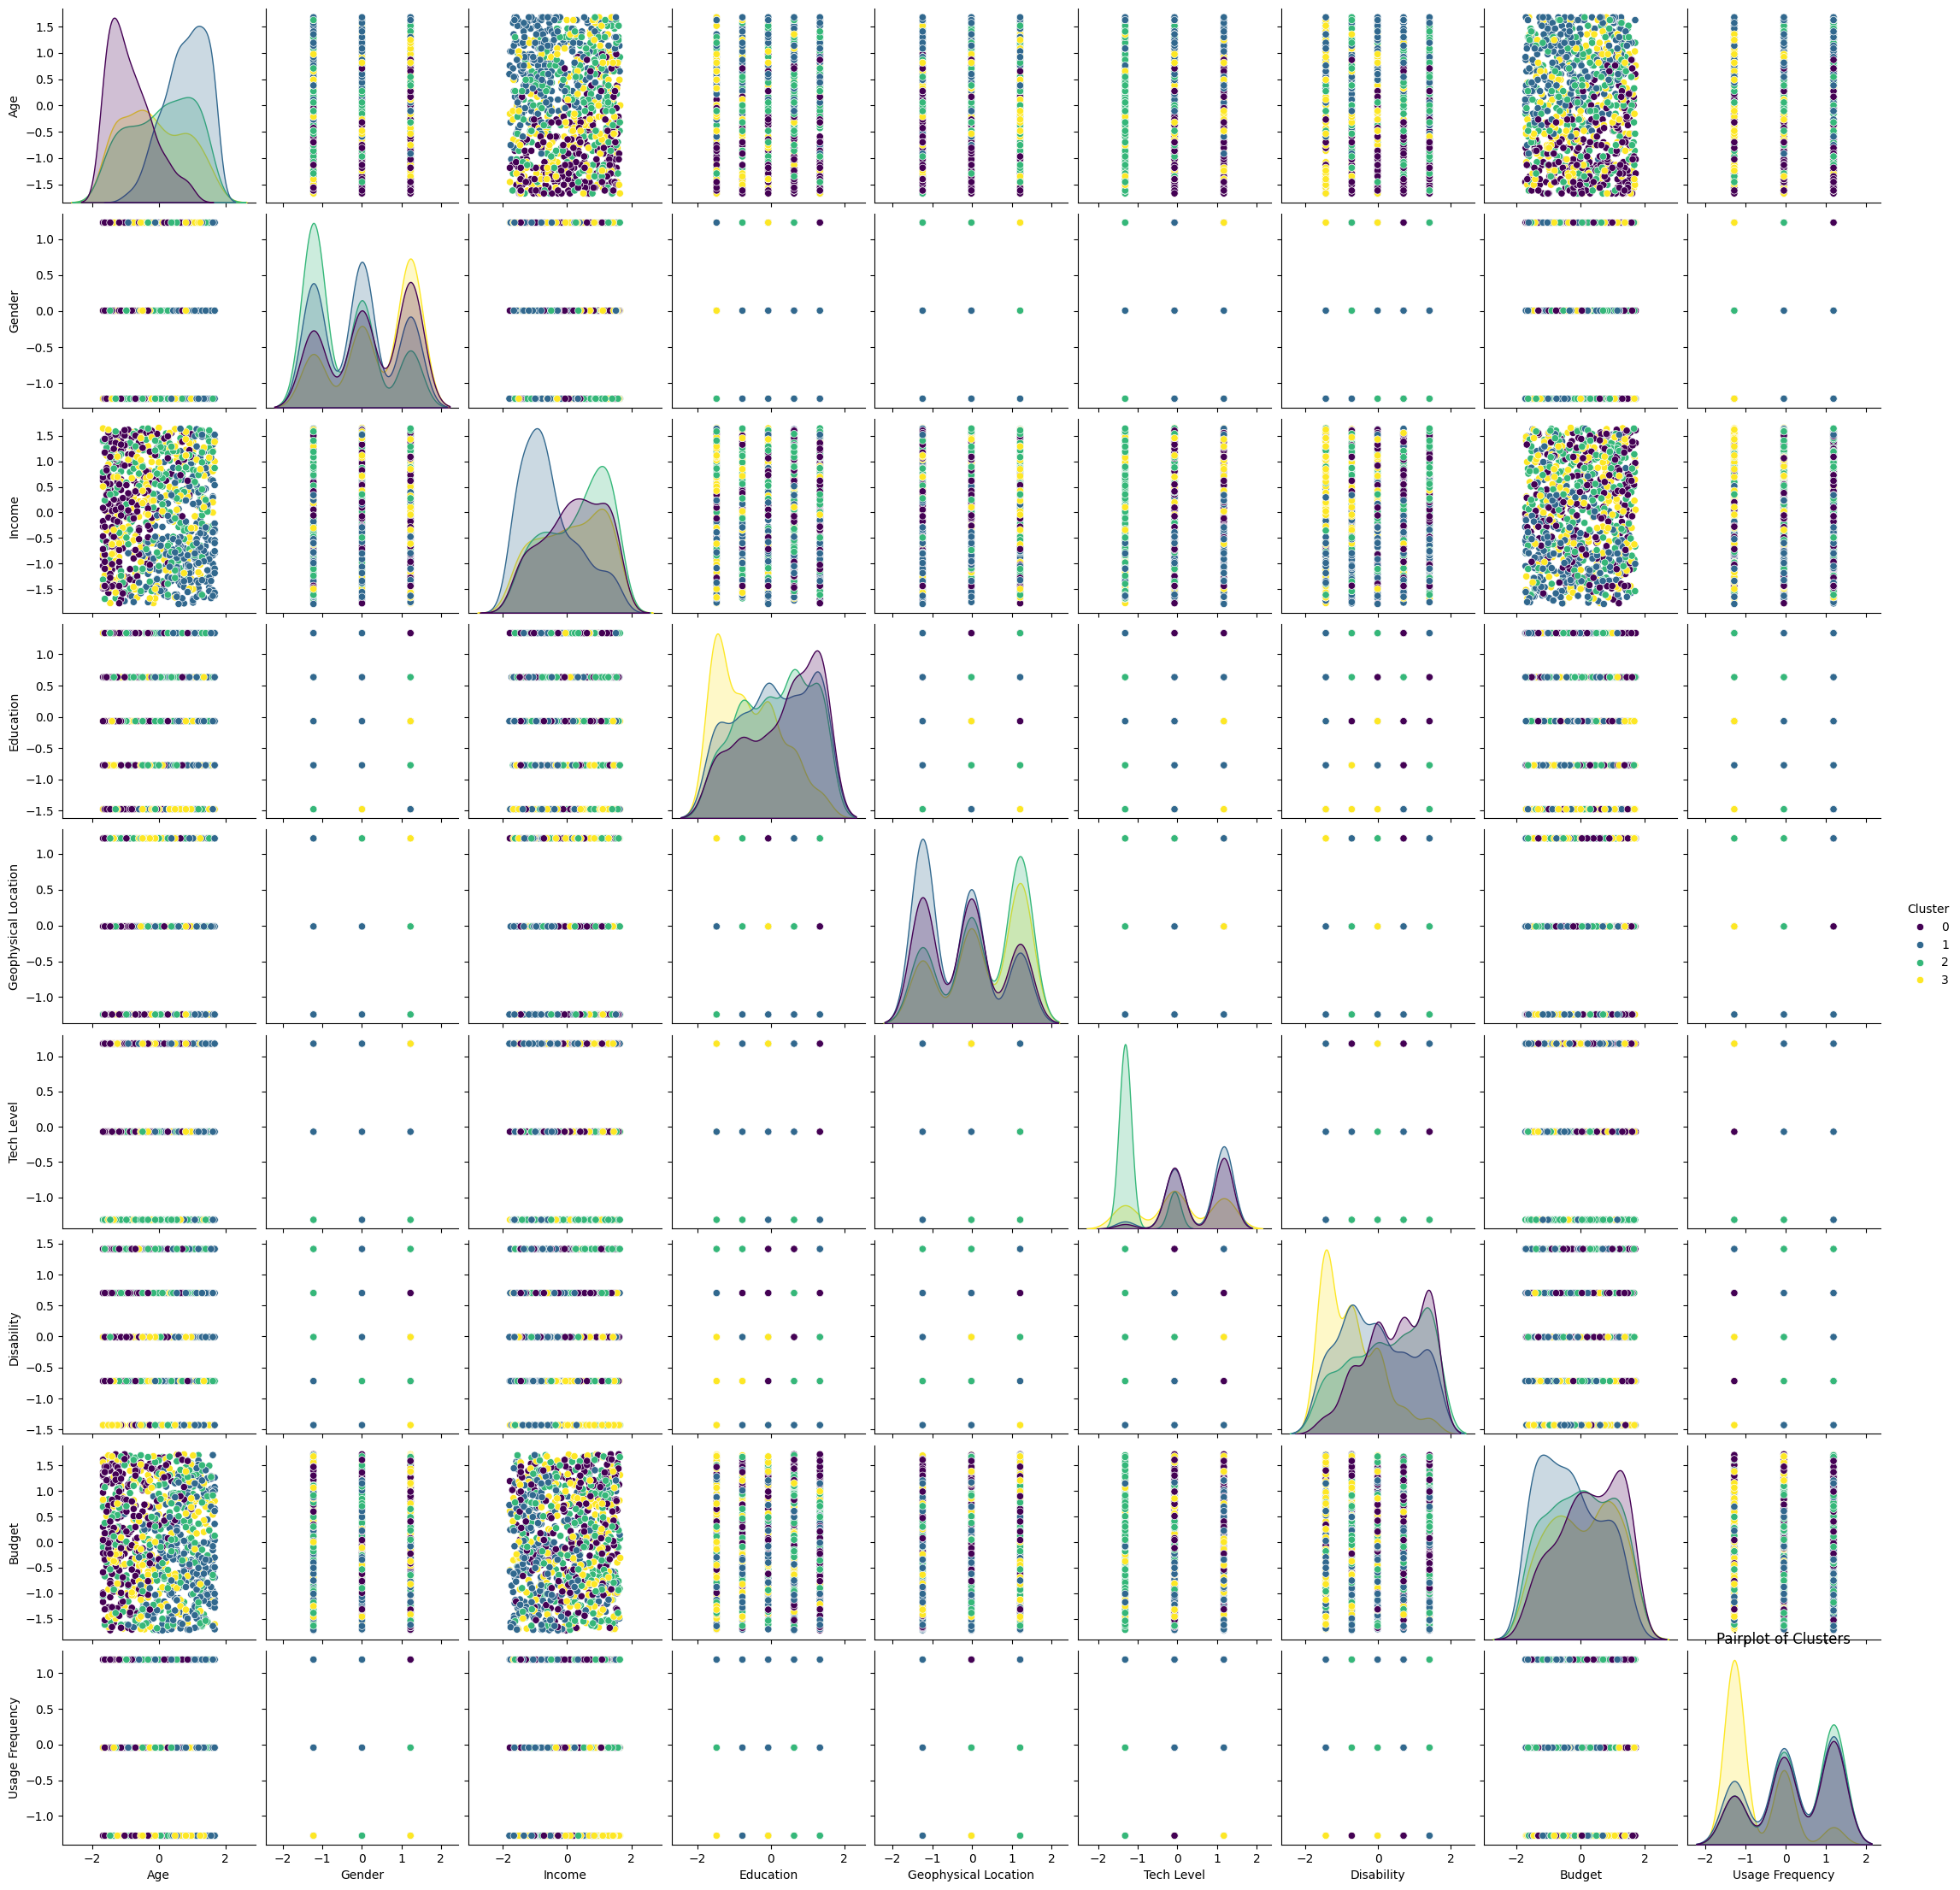

In [41]:
# Pairplot of clusters
sns.pairplot(scaled_df, hue='Cluster', palette='viridis')
plt.title('Pairplot of Clusters')
plt.show()


# Step 9

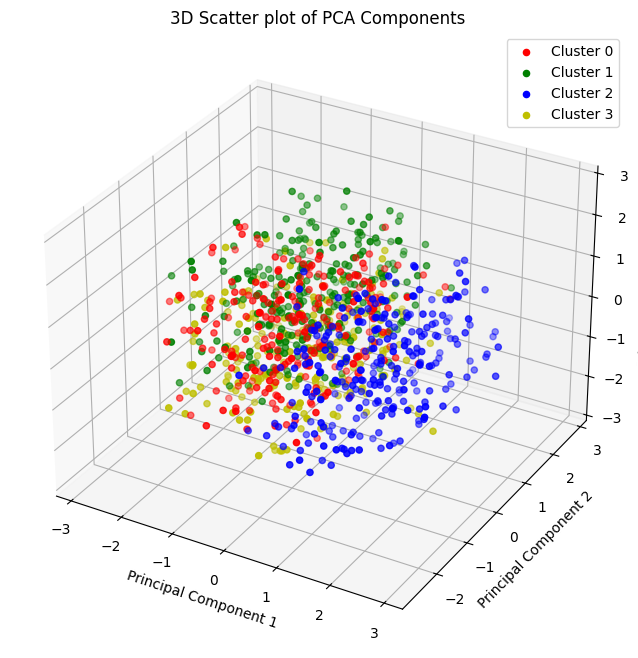

In [43]:
# Perform PCA to reduce to 3 components
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_df.drop('Cluster', axis=1))
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = clusters

# 3D Scatter plot using Matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for clusters
colors = ['r', 'g', 'b', 'y']
for cluster in range(optimal_clusters):
    ax.scatter(pca_df[pca_df['Cluster'] == cluster]['PC1'], 
               pca_df[pca_df['Cluster'] == cluster]['PC2'], 
               pca_df[pca_df['Cluster'] == cluster]['PC3'], 
               label=f'Cluster {cluster}', 
               c=colors[cluster])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter plot of PCA Components')

# Add legend
ax.legend()
plt.show()


# Step 10

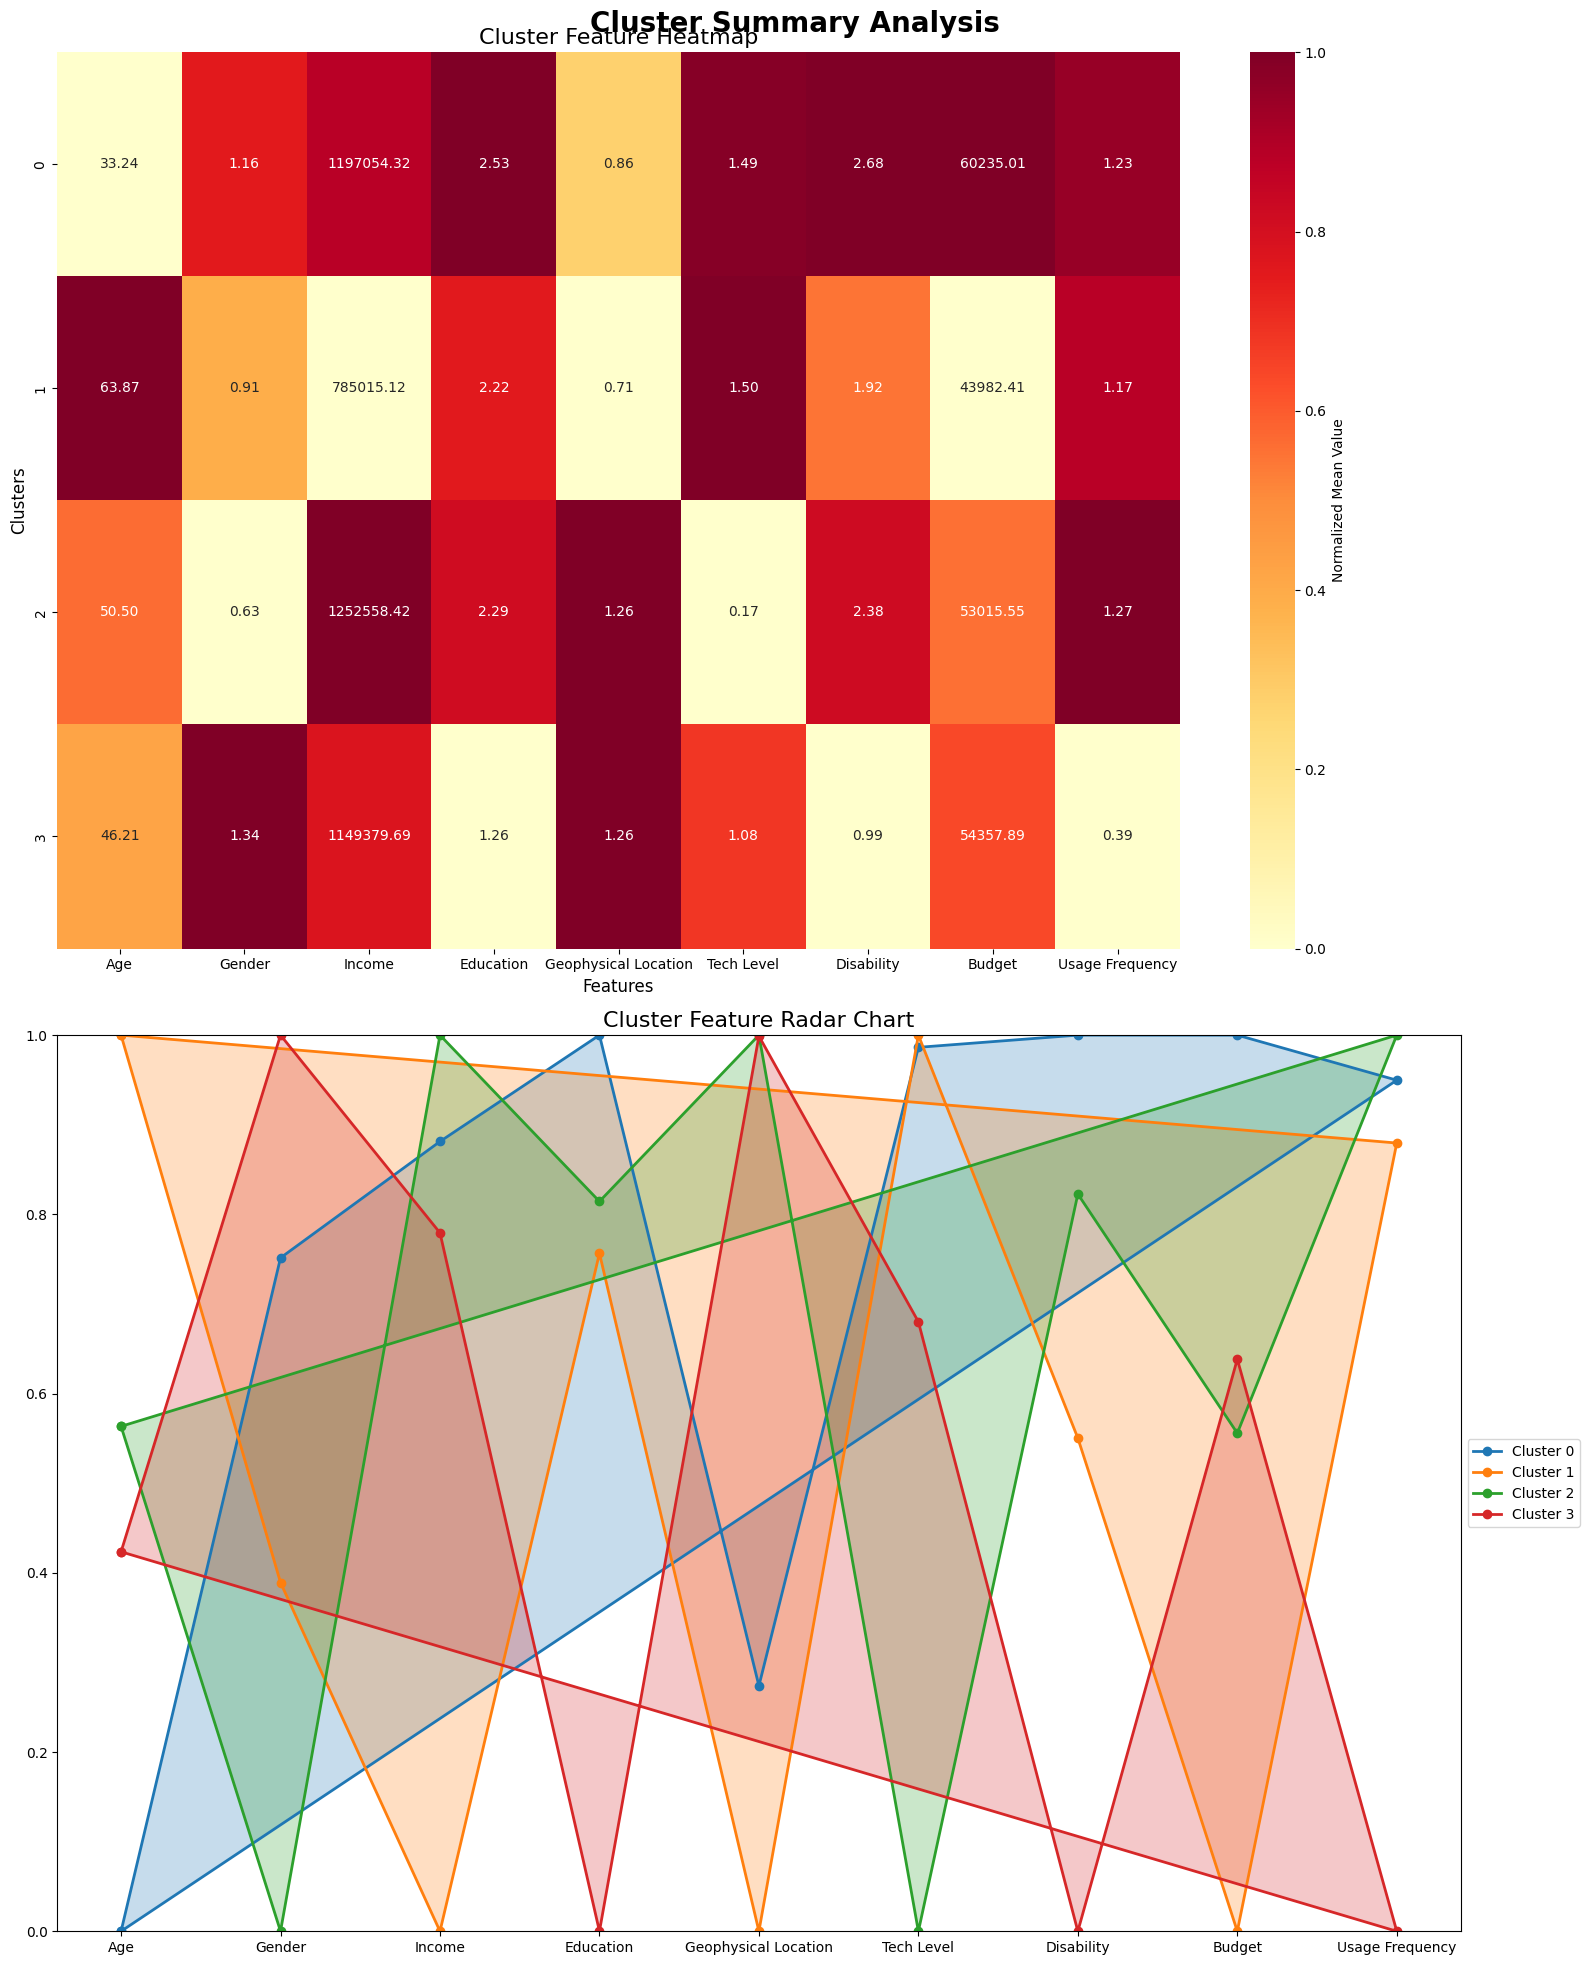


Cluster Sizes:
Cluster
0    241
1    270
2    257
3    223
Name: count, dtype: int64

Top Distinguishing Features for Each Cluster:

Cluster 0:
  Income: 1197054.32
  Budget: 60235.01
  Age: 33.24

Cluster 1:
  Income: 785015.12
  Budget: 43982.41
  Age: 63.87

Cluster 2:
  Income: 1252558.42
  Budget: 53015.55
  Age: 50.50

Cluster 3:
  Income: 1149379.69
  Budget: 54357.89
  Age: 46.21


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Calculate cluster summary
cluster_summary = data.groupby(scaled_df['Cluster']).mean()

# Normalize the data for better comparison
cluster_summary_normalized = cluster_summary.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Set up the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 20))
fig.suptitle('Cluster Summary Analysis', fontsize=20, fontweight='bold')

# Heatmap
sns.heatmap(cluster_summary_normalized, annot=cluster_summary.round(2), 
            fmt='.2f', cmap='YlOrRd', ax=ax1, cbar_kws={'label': 'Normalized Mean Value'})
ax1.set_title('Cluster Feature Heatmap', fontsize=16)
ax1.set_xlabel('Features', fontsize=12)
ax1.set_ylabel('Clusters', fontsize=12)

# Radar chart
angles = np.linspace(0, 2*np.pi, len(cluster_summary.columns), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # complete the circle

for i, cluster in enumerate(cluster_summary.index):
    values = cluster_summary_normalized.loc[cluster].values
    values = np.concatenate((values, [values[0]]))  # complete the circle
    ax2.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster}')
    ax2.fill(angles, values, alpha=0.25)

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(cluster_summary.columns)
ax2.set_ylim(0, 1)
ax2.set_title('Cluster Feature Radar Chart', fontsize=16)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print cluster sizes
cluster_sizes = scaled_df['Cluster'].value_counts().sort_index()
print("\nCluster Sizes:")
print(cluster_sizes)

# Print top distinguishing features for each cluster
print("\nTop Distinguishing Features for Each Cluster:")
for cluster in cluster_summary.index:
    cluster_features = cluster_summary.loc[cluster]
    top_features = cluster_features.nlargest(3)
    print(f"\nCluster {cluster}:")
    for feature, value in top_features.items():
        print(f"  {feature}: {value:.2f}")
